# Ensemble Methods

## **Description**

When hearing ensemble learning, we are refering to algorithms that can combine the predictions from two or more models. Due to this combination there can be an unlimited number of wats that ensemble learning methods can be achieved. Even with all these possible combinations, there are three classic techniques that are most commonly used. These methods are known as bagging, stacking and boosting which have their names known from their wide use in predictive modeling problems.

### Bagging Method
This method uses bootstrap aggregation, to seek a diverse group of ensemble members by varying the training data. Usually trains each model on a different sample of the same training data set, while its predictions are then combined using simple statistics. The key to the method is the manner in which each sample of the dataset is prepared to train ensemble members. Each model gets its own unique sample of the dataset.

- Bootstrapping samples the training data
- unpruned decision trees fit on each sample
- averaging of predictions

![Bagging](image1.jpg)

### Stacking Method
Stacking is another form of esemble learning that seeks a diverse group of members by varying the model types in training the data and combining the predictions. Stacking has its own nomenclature where ensemble members are referred to as level-0 models and the model that is used to combine the predictions is referred to as a level-1 model.

- Unchanged training data set
- Different machine learning for each ensemble member
- Machine leaning model to learn how to best combine predictions

![Stacking](stacking.png)

### Boosting Method
Boosting is the final form of ensemble learning that seeks to chagne the training data to focus on examples that previous models on the training data set have made an error. This is the key to this type of method, since it helps correct the prediction errors. The models made are added sequentially, so that each model corrects the errors of the previouse models.

- Bias training data toward those examples that are hard to predict.
- Iteratively add ensemble members to correct predictions of prior models.
- Combine predictions using a weighted average of models.

![Boosting](Boosting.png)

## Packages used
- matplotlib.pyplot
- numpy
- pandas
- seaborn
- sklearn
- mlxtend

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions

In [17]:
df = pd.read_csv("MoviesData.csv")

## Create a quick graph to help us visualize the data 

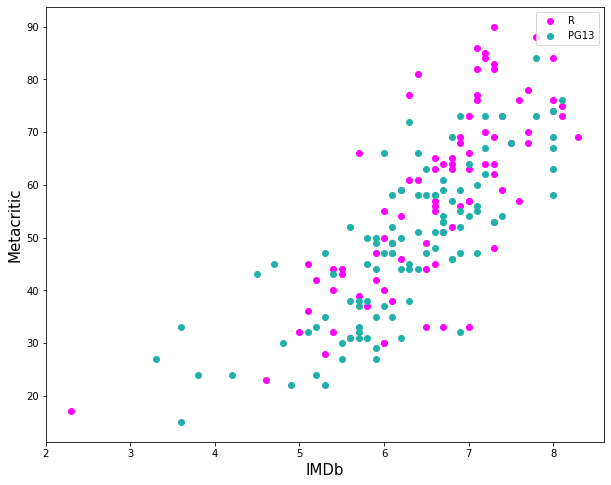

In [18]:
X = df[['IMDb','Metacritic']].to_numpy()
# Define labeling function
def make_labels(y):
    if y == "R":
        return 0
    else:
        return 1

y = df["Rating"].map(make_labels).to_numpy()

# Plot the data
age = ["R", "PG13"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(age, colors):
    temp_df = df[df.Rating == species]
    ax.scatter(temp_df.IMDb,
               temp_df.Metacritic,
               c = color,
               label = species, 
               )

ax.set_xlabel("IMDb", fontsize = 15)
ax.set_ylabel("Metacritic", fontsize = 15)
ax.legend()
plt.show()

## compare to decision tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)



stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.46      0.33      0.39        33
           1       0.67      0.77      0.72        57

    accuracy                           0.61        90
   macro avg       0.56      0.55      0.55        90
weighted avg       0.59      0.61      0.59        90
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        33
           1       0.67      0.74      0.70        57

    accuracy                           0.60        90
   macro avg       0.56      0.55      0.55        90
weighted avg       0.59      0.60      0.59        90
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        33
           1       0.66      0.79      0.72        57

    accuracy                           0.61        90
   macro avg       0.56      0.55      

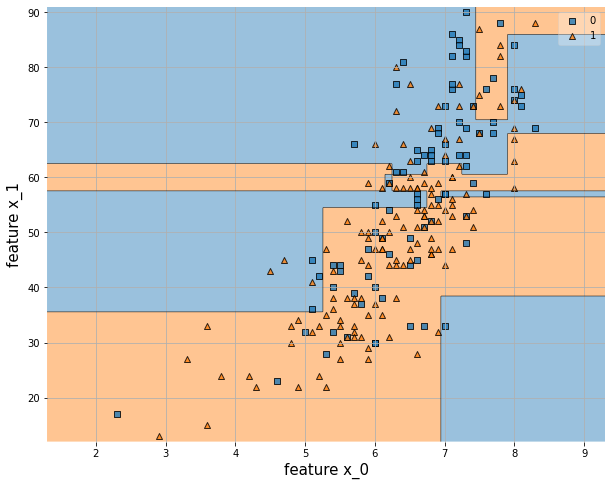

In [20]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

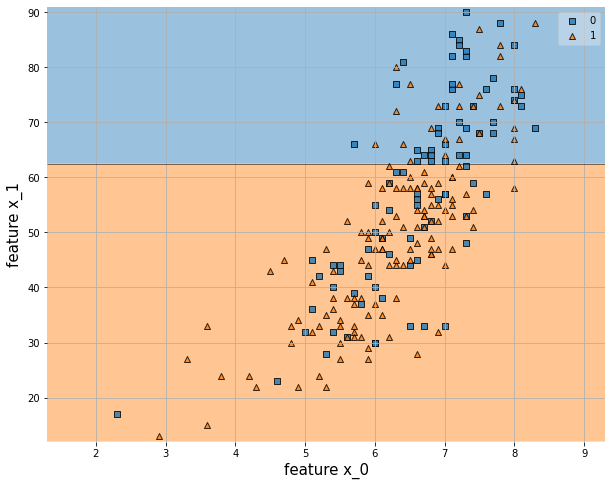

In [21]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()